<a href="https://colab.research.google.com/github/nedayghb/Dummyvariable/blob/main/predict_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#predict -salary

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [2]:

with open('/content/drive/MyDrive/Data science/1-hiring.csv', 'w', newline='') as file:
     writer = csv.writer(file)
     
     writer.writerow(["experience", "test_score(out of 10)", "interview_score(out of 10)","salary($)"])
     writer.writerow([1,0,8,9,50000])
     writer.writerow([2,0,8,6,45000])
     writer.writerow([3,5,6,7,60000])
     writer.writerow([4,2,10,10,65000])
     writer.writerow([5,7,9,6,70000])
     writer.writerow([6,3,7,10,62000])
     writer.writerow([7,10,0,7,72000])
     writer.writerow([8,11,7,8,80000])


In [3]:
#خواندن فایل csv
salary=pd.read_csv('/content/drive/MyDrive/Data science/1-hiring.csv')

In [66]:

def find_mean_prod():
   df=pd.DataFrame(salary)
   print(df)
   print("experience", "test_score(out of 10)", "interview_score(out of 10)","salary($)\n")
   result = df.iloc[1:8,1:]
 #  print("mean is\n", result.mean())
 #  print("std is\n", result.std())
 #  print("median is\n", result.median())
 #  print("mode is\n", result.mode())
#find_mean_prod()
   return df 


In [67]:
# calculating mean of test score
import math
median_test_score = math.floor(salary['test_score(out of 10)'].mean())
median_test_score

6

In [68]:
#salary['test_score(out of 10)']=salary(['test_score(out of 10)'][7]).fillna(median_test_score) 
salary['test_score(out of 10)'][7]=median_test_score
salary


,experience,test_score(out of 10),interview_score(out of 10),salary($)
1,0,8,9,50000
2,0,8,6,45000
3,5,6,7,60000
4,2,10,10,65000
5,7,9,6,70000
6,3,7,10,62000
7,10,6,7,72000
8,11,7,8,80000


In [69]:
#تماشای داده ها- توصیف
salary.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,8.00000,8.000000,8.000000,8.00000
mean,4.75000,7.625000,7.875000,63000.00000
std,4.26782,1.407886,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,6.750000,6.750000,57500.00000
50%,4.00000,7.500000,7.500000,63500.00000
75%,7.75000,8.250000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


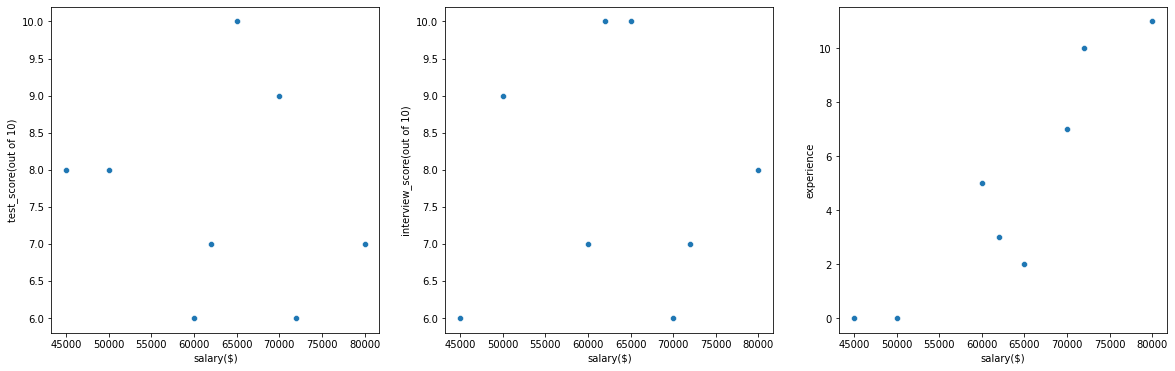

In [70]:
# ترسیم حقوق و وابستگی آن به شاخص های دیگر هر فرد
fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(salary['salary($)'],salary['test_score(out of 10)'],ax=ax[0])
sns.scatterplot(salary['salary($)'],salary['interview_score(out of 10)'],ax=ax[1])
sns.scatterplot(salary['salary($)'],salary['experience'],ax=ax[2])
plt.show()

Training Model

In [71]:
# splitting the data into X and y
# creating instance of Linear Regression
# and applying Linear Regression
reg = linear_model.LinearRegression()
salary2=reg.fit(salary[['experience','test_score(out of 10)','interview_score(out of 10)']],salary['salary($)'])
salary2

LinearRegression()

Pridict salary

Predict salary 2 yr experience, 9 test score, 6 interview score

In [72]:
salary2.predict([[2,9,6]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53922.45707556])

Predict salary 12 yr experience, 10 test score, 10 interview score

In [73]:
salary2.predict([[12,10,10]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([94857.62102523])

#پاسخ قسمت سوم سوال#

In [74]:
import pickle
# save the model to disk
filename = 'salary.sav'
pickle.dump(salary2, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(salary[['experience','test_score(out of 10)','interview_score(out of 10)']],salary['salary($)'])
print(result)

0.9870378236845744


In [75]:
import joblib
# save the model to disk
filename = 'salary.sav'
joblib.dump(salary2, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(salary[['experience','test_score(out of 10)','interview_score(out of 10)']],salary['salary($)'])
print(result)

0.9870378236845744
